Оригинал кода был получен тут https://www.machinelearningmastery.ru/yolo-object-detection-with-opencv-and-python-21e50ac599e9/


In [11]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')
#from google.colab.patches import cv2_imshow

# handle command line arguments
# ap = argparse.ArgumentParser()
# ap.add_argument('-i', '--image', required=True,
#                 help = 'path to input image')
# ap.add_argument('-c', '--config', required=True,
#                 help = 'path to yolo config file')
# ap.add_argument('-w', '--weights', required=True,
#                 help = 'path to yolo pre-trained weights')
# ap.add_argument('-cl', '--classes', required=True,
#                 help = 'path to text file containing class names')
# args = ap.parse_args()

/content/drive/My Drive/Colab Notebooks/Yolo/YOLOv3


'/content/drive/My Drive/Colab Notebooks/Yolo/YOLOv3'

In [ ]:
 !wget https://pjreddie.com/media/files/yolov3.weights

--2021-07-18 04:20:27--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  37.6MB/s    in 6.8s    

2021-07-18 04:20:35 (34.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [31]:
def print_img(img):
    plt.figure(figsize = (100,20))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

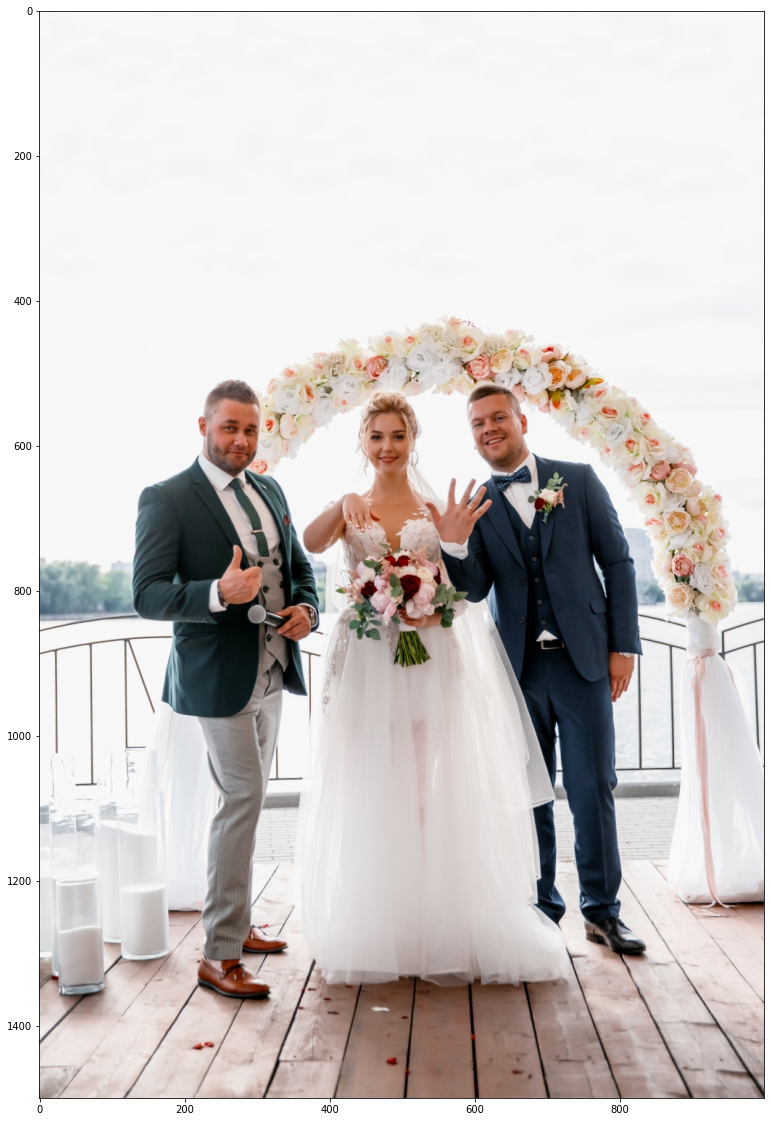

In [75]:
# read input image
# image = cv2.imread('dog.jpg')
image = cv2.imread('/10_photos/img10.jpg')
print_img(image)

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

# read class names from text file
classes = None
with open('yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# create input blob 
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)

In [76]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
 #   print(net.getLayerNames())
 #   print(net.getUnconnectedOutLayers())
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])
    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [77]:
# run inference through the network
# and gather predictions from output layers
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

person
person
person


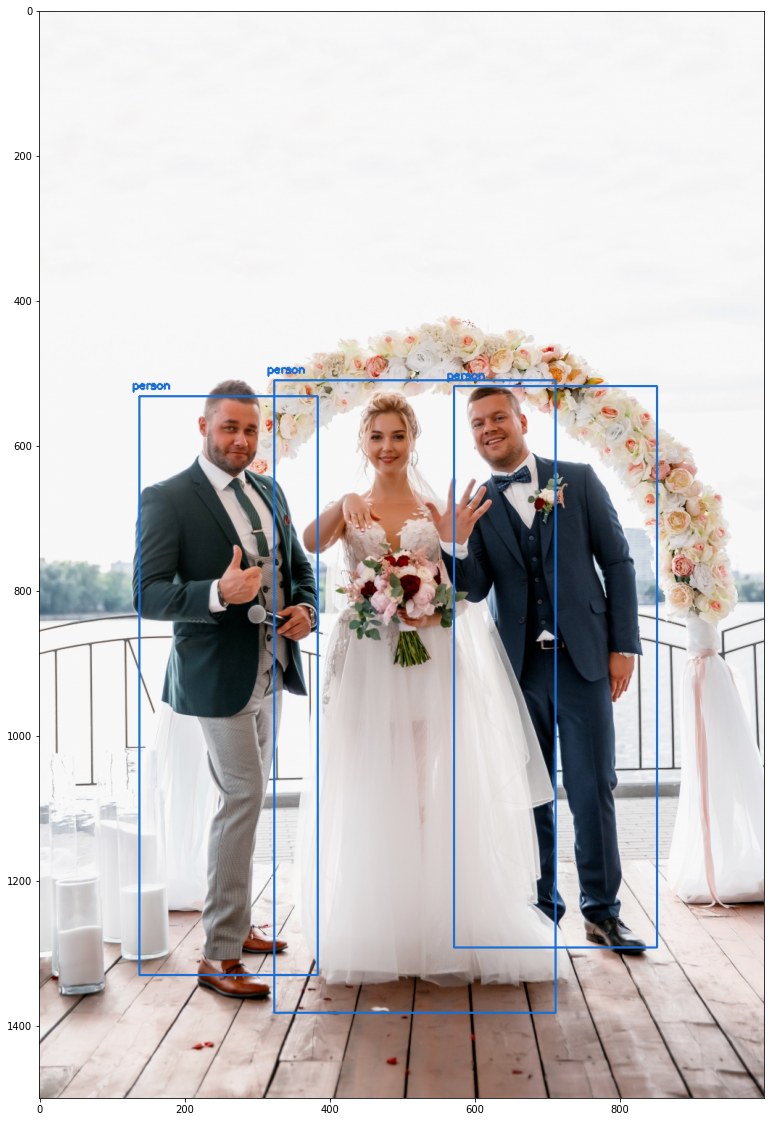

In [78]:
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# go through the detections remaining
# after nms and draw bounding box
for i in indices:
   # i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    print(classes[class_ids[i]])
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# display output image    
#cv2_imshow("object detection", image)
print_img(image)

# # wait until any key is pressed
# cv2.waitKey()
    
#  # save output image to disk
# cv2.imwrite("object-detection.jpg", image)

# # release resources
# cv2.destroyAllWindows()